### Load Packages and Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors

import pickle
import os

import shap

# The below extension properly formats a cell after it is run
%load_ext nb_black

# Setting the maximum number of rows and columns to 200
pd.set_option("display.max_rows", 200)
pd.set_option("display.max_columns", 200)

# Setting random seed
np.random.seed(42)


<IPython.core.display.Javascript object>

Loading files created in Random_forest_model notebook

In [2]:
# Defining the file paths for loading the pickled objects
best_rf_path = os.path.join("..", "data", "best_rf.pkl")
X_train_path = os.path.join("..", "data", "X_train.pkl")

# Loading the best_rf model
with open(best_rf_path, "rb") as f:
    best_rf = pickle.load(f)

# Loading the X_train DataFrame
X_train = pd.read_pickle(X_train_path)

<IPython.core.display.Javascript object>

### Creating a few visuals to look at SHAP values for different features

100%|===================| 2036/2046 [00:46<00:00]        

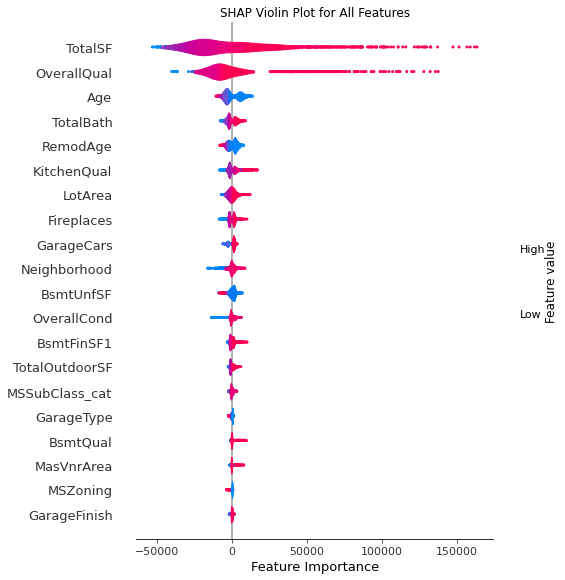

<IPython.core.display.Javascript object>

In [3]:
# # Creating a SHAP explainer for the RandomForest model
explainer = shap.Explainer(best_rf, X_train)

# Calculating SHAP values for the entire dataset
shap_values = explainer(X_train)

# Getting the base value (expected value) from the explainer
base_value = shap_values.base_values

# Setting the expected_value attribute for the SHAP values
shap_values.expected_value = base_value

# Creainge a violin plot figure with specified size
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the SHAP violin plot for all features
shap.plots.violin(shap_values, show=False)
ax.set_xlabel('Feature Importance')
ax.set_title('SHAP Violin Plot for All Features')

# Saving the plot as a .png file
plt.savefig('../pic/shap_violin_top_features.png', dpi=900)



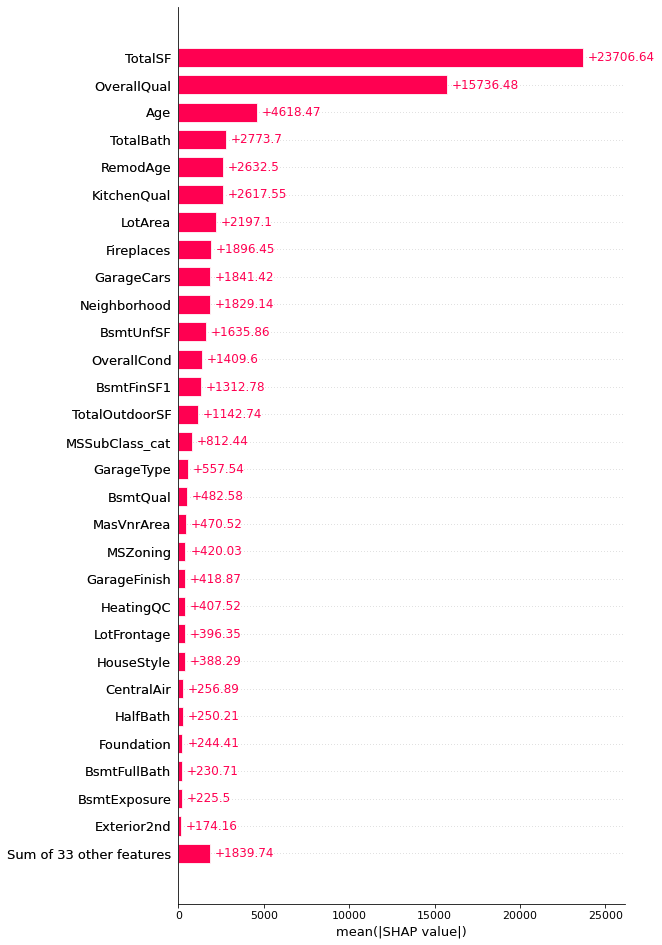

<IPython.core.display.Javascript object>

In [4]:
shap.plots.bar(shap_values, max_display=30)

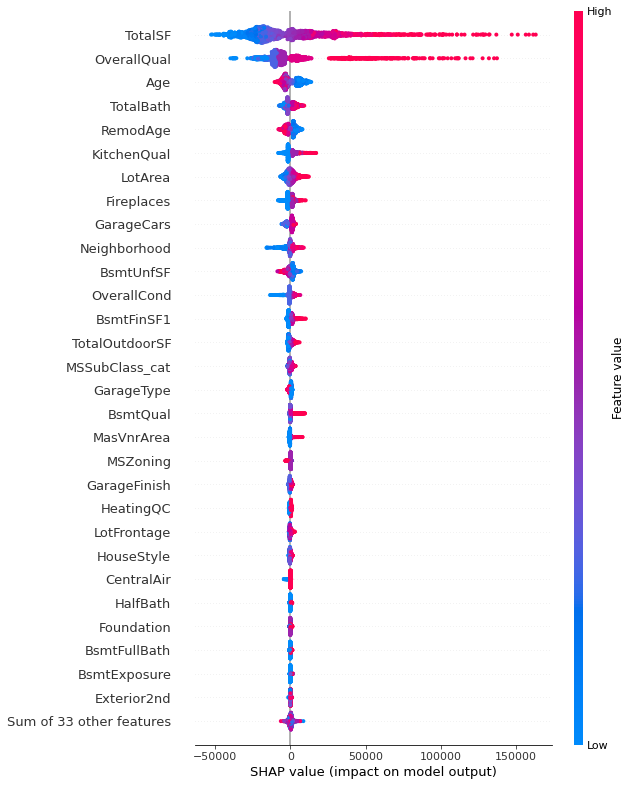

<IPython.core.display.Javascript object>

In [5]:
shap.plots.beeswarm(shap_values, max_display=30)

## Taking a closer look at SHAP values for KitchQual

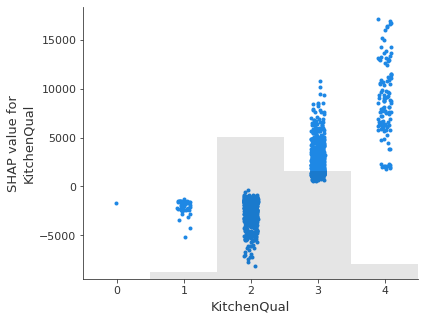

<IPython.core.display.Javascript object>

In [6]:
# Plot the interaction ShapValues of KitchenQual
shap.plots.scatter(shap_values[:, "KitchenQual"], show=False)

# Saving plot
plt.savefig("../pic/KithcenQual_Shap_range.png", dpi=900)


## Taking a closer look at the instances where SHAP values for KitchenQual are high

Indices of observations with high SHAP values for KitchenQual: [   9   85  168  190  576  855 1020 1347 1409 1861 1913]


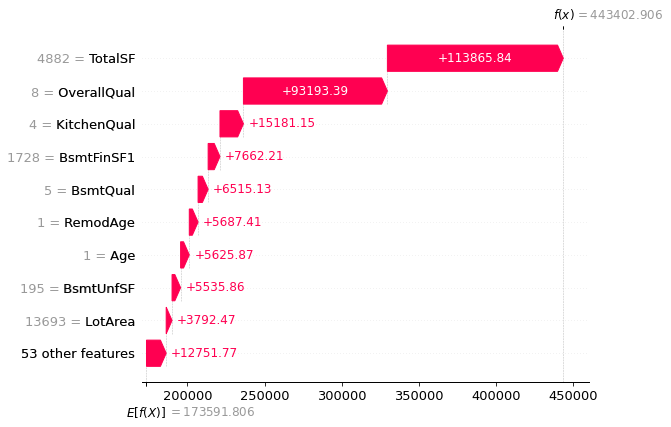

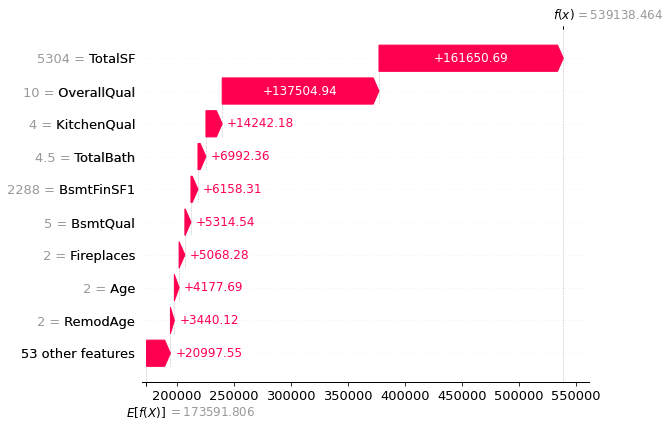

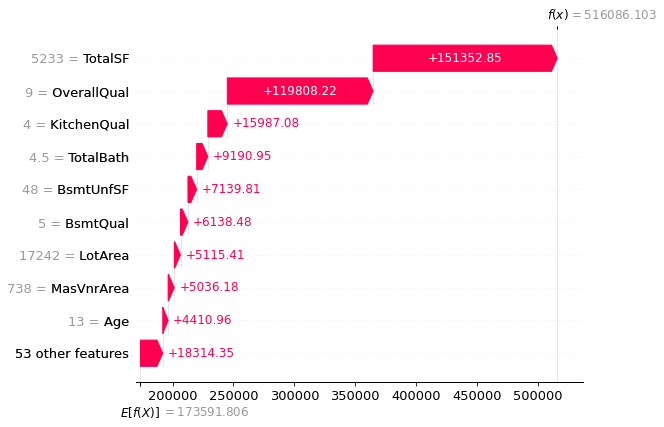

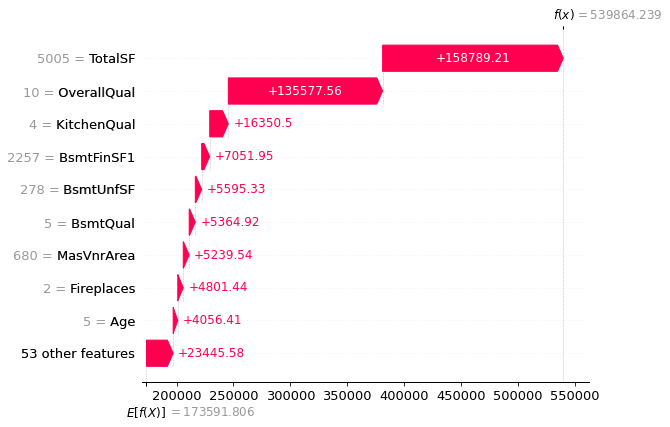

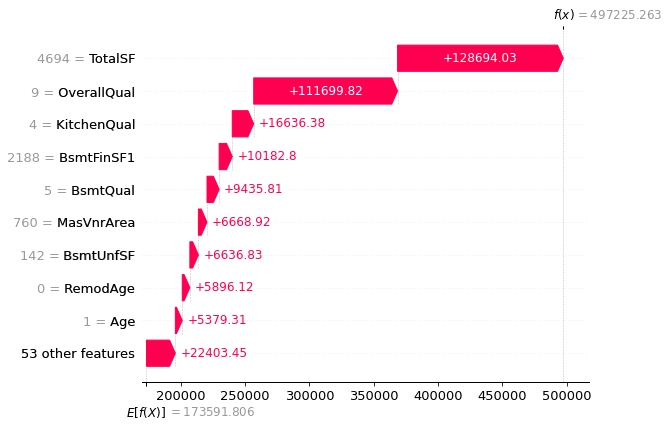

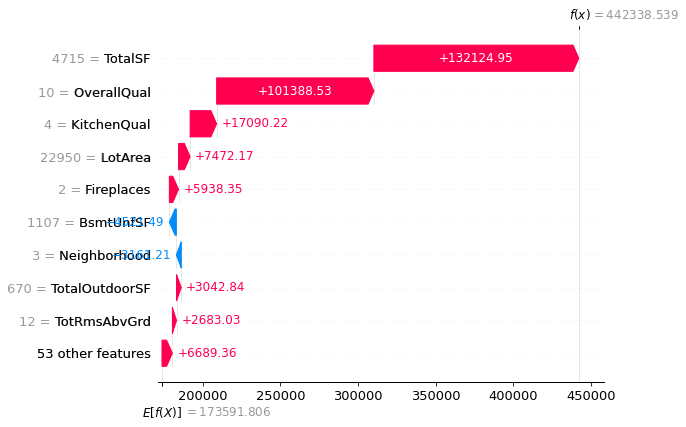

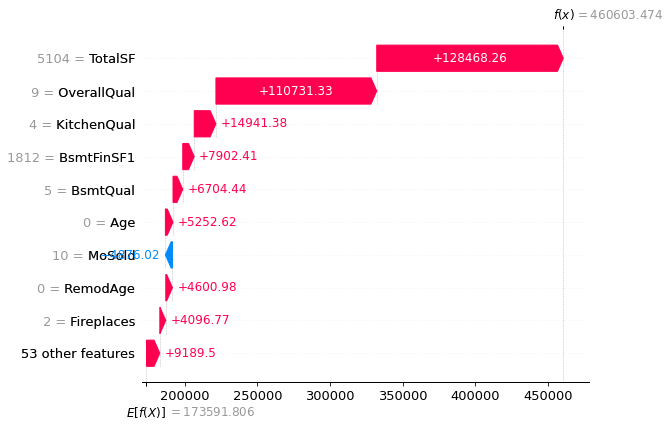

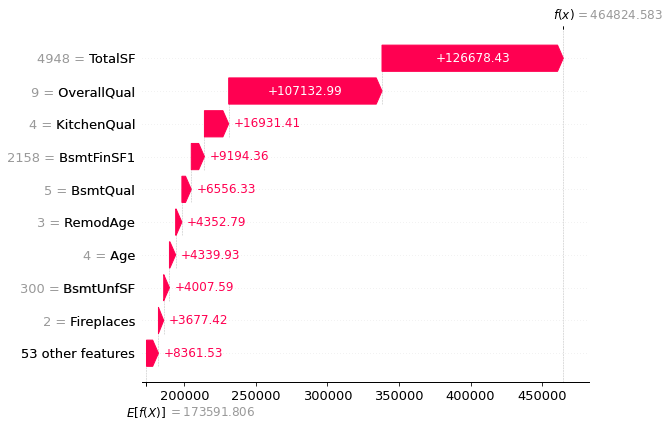

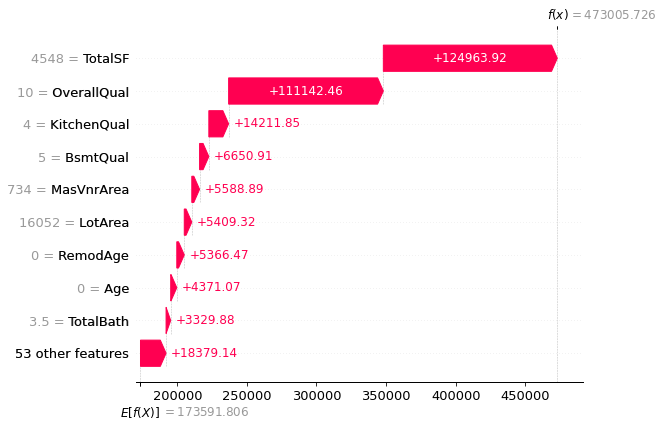

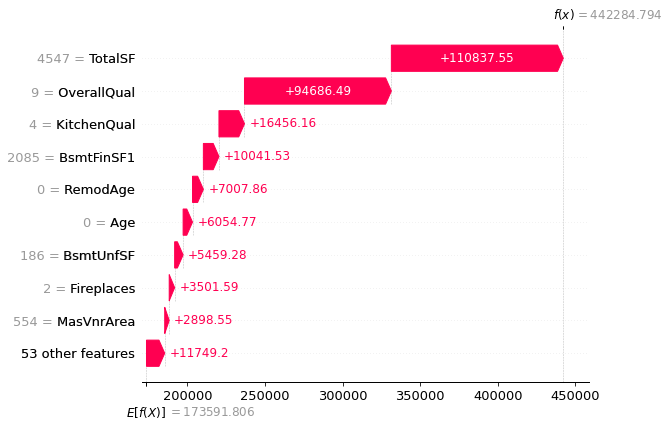

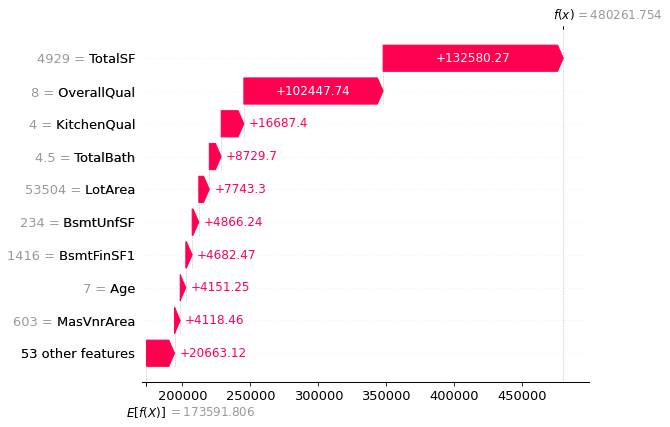

<IPython.core.display.Javascript object>

In [7]:
# Finding indices of observations with a SHAP value for KitchenQual greater than 14000
high_shap_indices = np.where(
    shap_values[:, X_train.columns.get_loc("KitchenQual")].values > 14000
)[0]

print(
    "Indices of observations with high SHAP values for KitchenQual:", high_shap_indices
)

# Plot the SHAP values as a waterfall plot for each high-value observation
for index in high_shap_indices:
    shap_values_instance = explainer(X_train.iloc[index : index + 1, :])
    shap.plots.waterfall(shap_values_instance[0])
    plt.show()

### Taking a closer look at SHAP values in larger homes

In [8]:
# First i want to look at how many larger homes are in the dataset
X_train[X_train["TotalSF"] > 3000].count()

MSZoning          468
LotFrontage       468
LotArea           468
Street            468
Alley             468
LotShape          468
LandContour       468
Utilities         468
LotConfig         468
LandSlope         468
Neighborhood      468
Condition1        468
Condition2        468
BldgType          468
HouseStyle        468
OverallQual       468
OverallCond       468
RoofStyle         468
RoofMatl          468
Exterior1st       468
Exterior2nd       468
MasVnrType        468
MasVnrArea        468
ExterCond         468
Foundation        468
BsmtQual          468
BsmtCond          468
BsmtExposure      468
BsmtFinSF1        468
BsmtFinSF2        468
BsmtUnfSF         468
Heating           468
HeatingQC         468
CentralAir        468
Electrical        468
BsmtFullBath      468
BsmtHalfBath      468
HalfBath          468
BedroomAbvGr      468
KitchenAbvGr      468
KitchenQual       468
TotRmsAbvGrd      468
Functional        468
Fireplaces        468
GarageType        468
GarageFini

<IPython.core.display.Javascript object>

In [10]:
# Convert the SHAP values to a DataFrame for easier analysis
shap_values_df = pd.DataFrame(shap_values.values, columns=X_train.columns)

# Reset the indices of X_train and shap_values_df
X_train.reset_index(drop=True, inplace=True)
shap_values_df.reset_index(drop=True, inplace=True)

<IPython.core.display.Javascript object>

In [11]:
# Adding the 'TotalSf_values' column to the shap_values_df DataFrame
shap_values_df['TotalSF_values'] = X_train['TotalSF'].values

# Filtering the shap_values_df DataFrame based on the 'TotalSf_values' column
shap_values_df_filtered = shap_values_df[shap_values_df['TotalSF_values'] > 3000].copy()

# Adding the 'KitchenQual_values' column to the filtered shap_values_df DataFrame
shap_values_df_filtered['KitchenQual_values'] = X_train.loc[shap_values_df_filtered.index, 'KitchenQual'].values

# Calculating the average SHAP value for each KitchenQual
for i in range(0, 5):
    avg_shap_KitchenQual = shap_values_df_filtered.loc[shap_values_df_filtered['KitchenQual_values'] == i, 'KitchenQual'].mean()
    print(f"Average SHAP value for KitchenQual {i}: {avg_shap_KitchenQual}")

# Dropping the 'TotalSf_values' and 'TotalBath_values' columns
shap_values_df_filtered.drop(columns=['TotalSF_values', 'KitchenQual_values'], inplace=True)


Average SHAP value for KitchenQual 0: nan
Average SHAP value for KitchenQual 1: -3203.1805034956333
Average SHAP value for KitchenQual 2: -4486.028792616881
Average SHAP value for KitchenQual 3: 3764.8895248084586
Average SHAP value for KitchenQual 4: 9762.841629150376


<IPython.core.display.Javascript object>

Great!  This shows there is an average SHAP penalty of $3,724 in homes over 3000 SF with KitchenQual of 1

In [12]:
# Add the 'TotalSf_values' column to the shap_values_df DataFrame
shap_values_df["TotalSF_values"] = X_train["TotalSF"].values

# Filter the shap_values_df DataFrame based on the 'TotalSf_values' column
shap_values_df_filtered = shap_values_df[shap_values_df["TotalSF_values"] < 1500].copy()

# Add the 'KitchenQual_values' column to the filtered shap_values_df DataFrame
shap_values_df_filtered["KitchenQual_values"] = X_train.loc[
    shap_values_df_filtered.index, "KitchenQual"
].values

# Calculate the average SHAP value for each KitchenQual
for i in range(0, 5):
    avg_shap_KitchenQual = shap_values_df_filtered.loc[
        shap_values_df_filtered["KitchenQual_values"] == i, "KitchenQual"
    ].mean()
    print(f"Average SHAP value for KitchenQual {i}: {avg_shap_KitchenQual}")

# Drop the 'TotalSf_values' and 'TotalBath_values' columns
shap_values_df_filtered.drop(
    columns=["TotalSF_values", "KitchenQual_values"], inplace=True
)

Average SHAP value for KitchenQual 0: nan
Average SHAP value for KitchenQual 1: -2084.814964467287
Average SHAP value for KitchenQual 2: -1519.226685214368
Average SHAP value for KitchenQual 3: 1340.896325390007
Average SHAP value for KitchenQual 4: nan


<IPython.core.display.Javascript object>

It looks like the penalty for having a poor quality kitchen in a smaller home is less which makes sense

### Looking at the waterfall plot of an instance that has a high SHAP value for KitchenQual

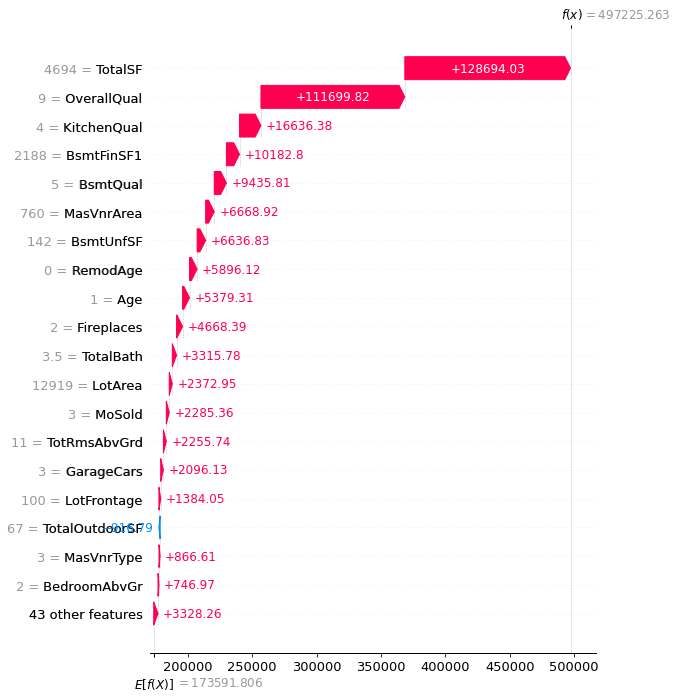

<IPython.core.display.Javascript object>

In [13]:
# Calculate SHAP values for the first instance in the dataset
instance_index = 576

# Get the SHAP values for the specified instance in X_train
shap_values_instance = explainer(X_train.iloc[instance_index:instance_index + 1, :])

# Plot the SHAP values as a waterfall plot for the instance
# A waterfall plot helps visualize the contribution of each feature to the final prediction for the instance
shap.plots.waterfall(shap_values_instance[0],max_display=20)



### Looking at how the SHAP values change when the KitchenQual is modified from a 4 to a 2 in this observation

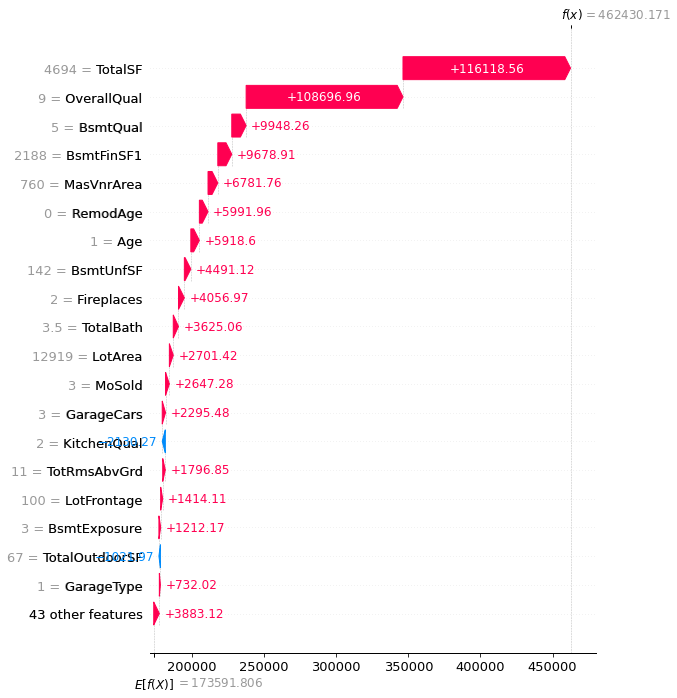

<IPython.core.display.Javascript object>

In [14]:
# Modify the KitchenQual variable for the specified instance
X_train.loc[576, 'KitchenQual'] = 2

# Create a SHAP explainer for the RandomForest model
explainer = shap.Explainer(best_rf, X_train)

# Calculate SHAP values for the modified instance
shap_values_instance = explainer(X_train.iloc[instance_index:instance_index + 1, :])

# Plot the SHAP values as a waterfall plot for the modified instance
shap.plots.waterfall(shap_values_instance[0],max_display=20)


## Which Neighborhoods value Kitchen Quality the most?

#### Town Names

In [15]:
#        Blmngtn	Bloomington Heights
#        Blueste	Bluestem
#        BrDale	Briardale
#        BrkSide	Brookside
#        ClearCr	Clear Creek
#        CollgCr	College Creek
#        Crawfor	Crawford
#        Edwards	Edwards
#        Gilbert	Gilbert
#        Greens	Greens
#        GrnHill	Green Hills
#        IDOTRR	Iowa DOT and Rail Road
#        Landmrk	Landmark
#        MeadowV	Meadow Village
#        Mitchel	Mitchell
#        Names	North Ames
#        NoRidge	Northridge
#        NPkVill	Northpark Villa
#        NridgHt	Northridge Heights
#        NWAmes	Northwest Ames
#        OldTown	Old Town
#        SWISU	South & West of Iowa State University
#        Sawyer	Sawyer
#        SawyerW	Sawyer West
#        Somerst	Somerset
#        StoneBr	Stone Brook
#        Timber	Timberland
#        Veenker	Veenker

<IPython.core.display.Javascript object>

In [16]:
Neighborhood_mapping = {
    "SWISU": 0,
    "Edwards": 1,
    "IDOTRR": 2,
    "OldTown": 3,
    "NWAmes": 4,
    "Blmngtn": 5,
    "Mitchel": 6,
    "NridgHt": 7,
    "NAmes": 8,
    "CollgCr": 9,
    "SawyerW": 10,
    "MeadowV": 11,
    "BrDale": 12,
    "Gilbert": 13,
    "Timber": 14,
    "Somerst": 15,
    "BrkSide": 16,
    "NoRidge": 17,
    "Sawyer": 18,
    "Crawfor": 19,
    "Greens": 20,
    "ClearCr": 21,
    "StoneBr": 22,
    "Veenker": 23,
    "NPkVill": 24,
    "Blueste": 25,
}


<IPython.core.display.Javascript object>

In [17]:
# Adding back the Neighborhood Grouping to Shap dataframe
shap_w_neighborhoods = pd.DataFrame(shap_values.values, columns=X_train.columns)
shap_w_neighborhoods["NeighborhoodGrouped"] = X_train["Neighborhood"]
shap_w_neighborhoods["KitchenQualGrouped"] = X_train["KitchenQual"]

# Moving KitchenQual to First Column
shap_w_neighborhoods.insert(0, "KitchenQual", shap_w_neighborhoods.pop("KitchenQual"))
shap_w_neighborhoods.insert(
    1, "KitchenQualGrouped", shap_w_neighborhoods.pop("KitchenQualGrouped")
)
shap_w_neighborhoods.insert(
    2, "NeighborhoodGrouped", shap_w_neighborhoods.pop("NeighborhoodGrouped")
)

# Inverting the Neighborhood_mapping dictionary so that it maps from float values to string values:
inverse_neighborhood_mapping = {v: k for k, v in Neighborhood_mapping.items()}

# Applying the mapping to the NeighborhoodGrouped column
shap_w_neighborhoods["NeighborhoodGrouped"] = shap_w_neighborhoods["NeighborhoodGrouped"].map(inverse_neighborhood_mapping)

# Grouping by Neighborhood and getting average Kitchen Values
shap_grouped = shap_w_neighborhoods.groupby(by="NeighborhoodGrouped")
shap_grouped_avg = shap_grouped.mean().sort_values(by="KitchenQual", ascending=False)[["KitchenQual"]]

shap_grouped_avg


,KitchenQual
NeighborhoodGrouped,
NridgHt,5839.668995
StoneBr,4696.399431
NoRidge,4503.550695
Veenker,3160.549565
Somerst,3085.957952
Timber,2554.029238
Blmngtn,2405.600113
CollgCr,1938.195744
SawyerW,1868.057838


<IPython.core.display.Javascript object>

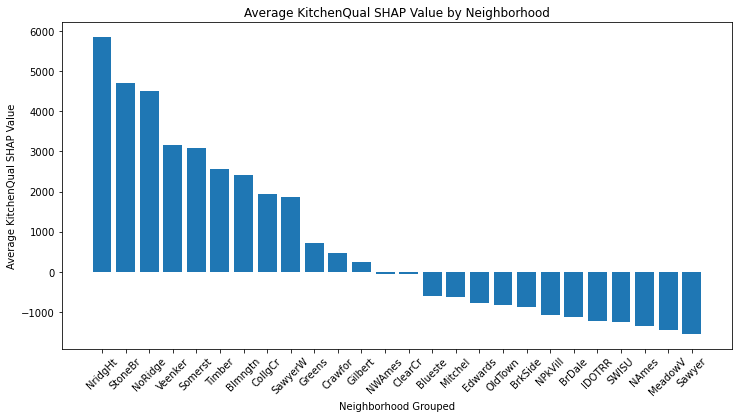

<IPython.core.display.Javascript object>

In [18]:
# Looking at the numbers in a bar chart

# Set the plot size
plt.figure(figsize=(12, 6))

# Create the bar chart
plt.bar(shap_grouped_avg.index, shap_grouped_avg['KitchenQual'])

# Set the chart labels and title
plt.xlabel('Neighborhood Grouped')
plt.ylabel('Average KitchenQual SHAP Value')
plt.title('Average KitchenQual SHAP Value by Neighborhood')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()


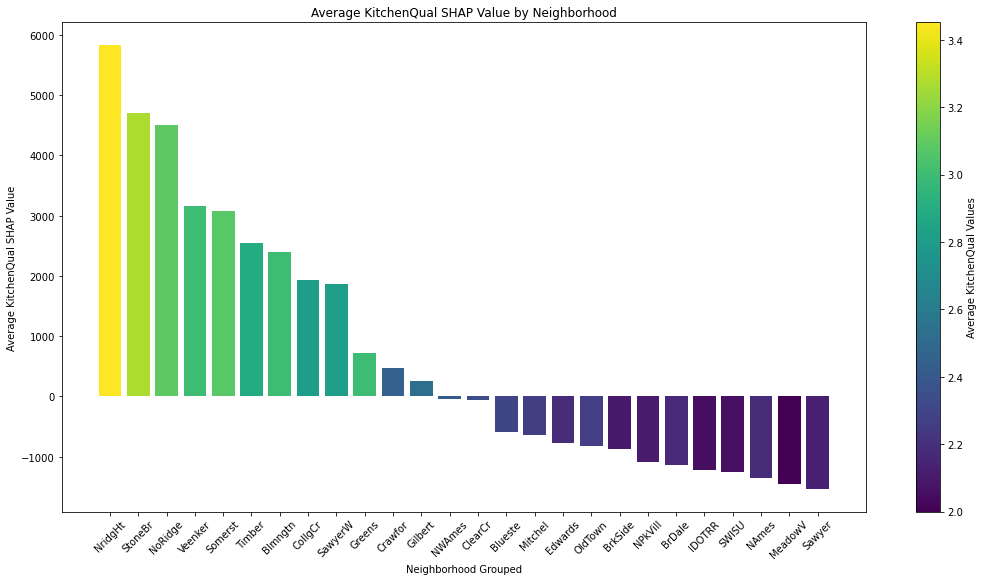

<IPython.core.display.Javascript object>

In [19]:
# Compute the average KitchenQual value for each neighborhood in X_train
avg_kitchen_qual = X_train.groupby("Neighborhood")["KitchenQual"].mean()

# Map the neighborhood numbers in X_train back to the neighborhood names
avg_kitchen_qual.index = avg_kitchen_qual.index.map(inverse_neighborhood_mapping)

# Create a colormap and a normalization instance
cmap = plt.cm.get_cmap("viridis")
norm = mcolors.Normalize(vmin=avg_kitchen_qual.min(), vmax=avg_kitchen_qual.max())

# Set the plot size
plt.figure(figsize=(18, 9))

# Create the bar chart with colors based on the average KitchenQual values
plt.bar(shap_grouped_avg.index, shap_grouped_avg['KitchenQual'], color=cmap(norm(avg_kitchen_qual.loc[shap_grouped_avg.index])))

# Set the chart labels and title
plt.xlabel('Neighborhood Grouped')
plt.ylabel('Average KitchenQual SHAP Value')
plt.title('Average KitchenQual SHAP Value by Neighborhood')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Add a colorbar to show the colormap
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm, label='Average KitchenQual Values')

# Display the plot
plt.show()


In [20]:
avg_kitchen_qual


Neighborhood
SWISU      2.057143
Edwards    2.178862
IDOTRR     2.052632
OldTown    2.265060
NWAmes     2.418367
Blmngtn    3.000000
Mitchel    2.256098
NridgHt    3.451613
NAmes      2.179412
CollgCr    2.804348
SawyerW    2.808511
MeadowV    2.000000
BrDale     2.160000
Gilbert    2.517857
Timber     2.888889
Somerst    3.072727
BrkSide    2.098765
NoRidge    3.094340
Sawyer     2.130435
Crawfor    2.442857
Greens     3.000000
ClearCr    2.344828
StoneBr    3.272727
Veenker    3.000000
NPkVill    2.105263
Blueste    2.300000
Name: KitchenQual, dtype: float64

<IPython.core.display.Javascript object>

In [21]:
# Top 10
shap_grouped_avg.nlargest(10, "KitchenQual")

,KitchenQual
NeighborhoodGrouped,
NridgHt,5839.668995
StoneBr,4696.399431
NoRidge,4503.550695
Veenker,3160.549565
Somerst,3085.957952
Timber,2554.029238
Blmngtn,2405.600113
CollgCr,1938.195744
SawyerW,1868.057838


<IPython.core.display.Javascript object>

In [22]:
# Bottom 10
shap_grouped_avg.nsmallest(10, "KitchenQual")

,KitchenQual
NeighborhoodGrouped,
Sawyer,-1542.336022
MeadowV,-1449.053740
NAmes,-1351.232722
SWISU,-1261.038994
IDOTRR,-1216.261003
BrDale,-1129.532249
NPkVill,-1086.869347
BrkSide,-877.939661
OldTown,-817.190443


<IPython.core.display.Javascript object>

## Neighborhood Breakdown

In These neighborhoods where kitchens are weighed heavily, we find the lower quality kitchens and target them for renovation showing the client that they specifically have the most to benefit in this specific neighborhood \n specifically the quality 2

In [23]:
# 17
shap_w_neighborhoods[shap_w_neighborhoods["NeighborhoodGrouped"] == "NoRidge"].iloc[
    :, 0:3
].sort_values("KitchenQualGrouped")

,KitchenQual,KitchenQualGrouped,NeighborhoodGrouped
1712,-2465.467617,2,NoRidge
105,3177.197929,3,NoRidge
882,3378.935551,3,NoRidge
934,3039.177545,3,NoRidge
995,3372.280367,3,NoRidge
1170,3155.581253,3,NoRidge
1192,3020.850457,3,NoRidge
1281,3549.640351,3,NoRidge
1310,4954.702461,3,NoRidge
1447,6186.300645,3,NoRidge


<IPython.core.display.Javascript object>

In [24]:
# 23
shap_w_neighborhoods[shap_w_neighborhoods["NeighborhoodGrouped"] == "Veenker"].iloc[
    :, 0:3
].sort_values("KitchenQualGrouped")

,KitchenQual,KitchenQualGrouped,NeighborhoodGrouped
1968,-1479.972595,2,Veenker
1275,-1800.716936,2,Veenker
292,-3104.561801,2,Veenker
1953,-1194.222649,2,Veenker
1609,7815.373515,3,Veenker
1269,3102.301756,3,Veenker
1212,7821.353711,3,Veenker
1095,2363.016363,3,Veenker
607,2081.891441,3,Veenker
407,2561.408268,3,Veenker


<IPython.core.display.Javascript object>

In [25]:
# 16
shap_w_neighborhoods[shap_w_neighborhoods["NeighborhoodGrouped"] == "BrkSide"].iloc[
    :, 0:3
].sort_values("KitchenQualGrouped")

,KitchenQual,KitchenQualGrouped,NeighborhoodGrouped
1334,-2090.079300,1,BrkSide
830,-1915.651116,1,BrkSide
42,-1445.818732,1,BrkSide
1775,-2394.130994,1,BrkSide
1754,-1918.743341,1,BrkSide
342,-2282.801901,1,BrkSide
972,-2256.104535,1,BrkSide
1189,-2209.860236,1,BrkSide
1,-4089.458394,2,BrkSide
1332,-1614.951488,2,BrkSide


<IPython.core.display.Javascript object>

In [26]:
# 25
shap_w_neighborhoods[shap_w_neighborhoods["NeighborhoodGrouped"] == "Blueste"].iloc[
    :, 0:3
].sort_values("KitchenQualGrouped")

,KitchenQual,KitchenQualGrouped,NeighborhoodGrouped
73,-1257.619716,2,Blueste
448,-855.405990,2,Blueste
676,-1219.633153,2,Blueste
1068,-1282.497735,2,Blueste
1389,-1235.951118,2,Blueste
1429,-1151.441598,2,Blueste
1620,-1224.618350,2,Blueste
183,635.565804,3,Blueste
807,554.084491,3,Blueste
1591,1127.856904,3,Blueste


<IPython.core.display.Javascript object>

In [27]:
# 22
shap_w_neighborhoods[shap_w_neighborhoods["NeighborhoodGrouped"] == "StoneBr"].iloc[
    :, 0:3
].sort_values("KitchenQualGrouped")

,KitchenQual,KitchenQualGrouped,NeighborhoodGrouped
1901,-889.251636,2,StoneBr
268,-1257.591601,2,StoneBr
18,1858.034555,3,StoneBr
1636,3717.504377,3,StoneBr
1180,1280.907996,3,StoneBr
1131,853.796406,3,StoneBr
1758,3229.903495,3,StoneBr
880,3509.219093,3,StoneBr
811,2751.442384,3,StoneBr
797,4809.343079,3,StoneBr


<IPython.core.display.Javascript object>

## Creating visuals for project presentation

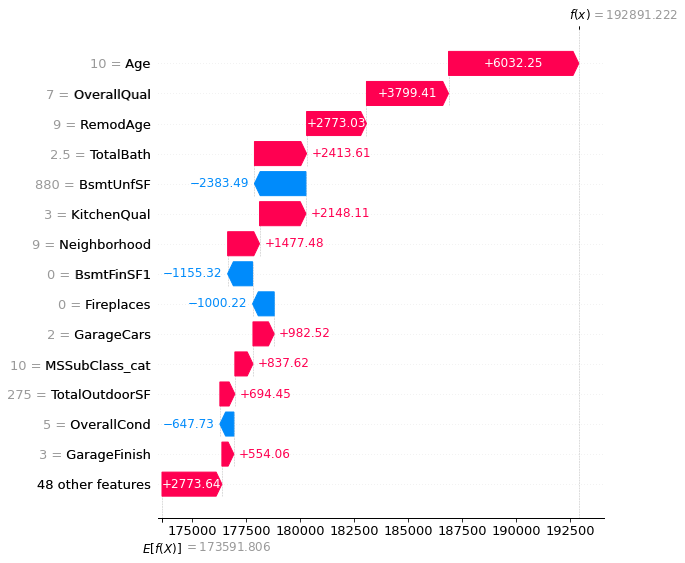

<IPython.core.display.Javascript object>

In [28]:
# Selecting observation for waterfall
instance_index = 109

# Get the SHAP values for the specified instance in X_train
shap_values_instance = explainer(X_train.iloc[instance_index : instance_index + 1, :])

# Plot the SHAP values as a waterfall plot for the instance
# A waterfall plot helps visualize the contribution of each feature to the final prediction for the instance
shap.plots.waterfall(shap_values_instance[0], max_display=15)

# Save the figure to a file
# plt.savefig("Waterfall_Example109.png", bbox_inches="tight", dpi=900)

# Show the figure
plt.show()

# Close the figure
plt.close(fig)

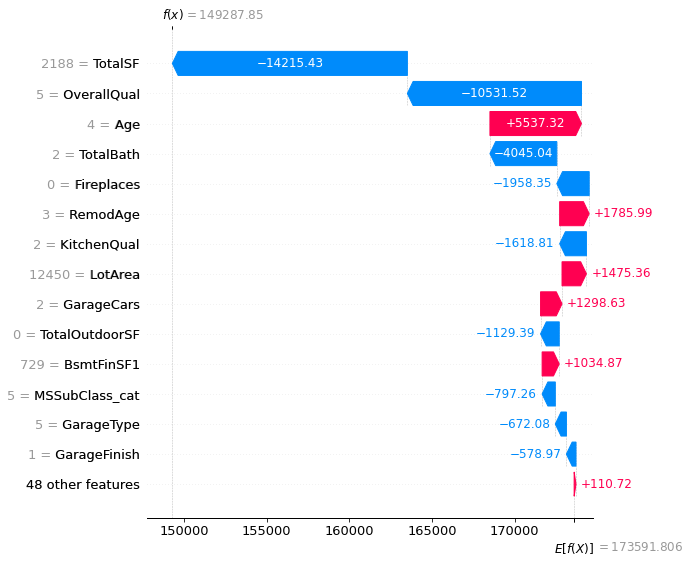

<IPython.core.display.Javascript object>

In [29]:

X_train.loc[10, 'KitchenQual'] = 2


# Calculate SHAP values for the first instance in the dataset
instance_index = 10

# Create a SHAP explainer for the RandomForest model
explainer = shap.Explainer(best_rf, X_train)

# Calculate SHAP values for the modified instance
shap_values_instance = explainer(X_train.iloc[instance_index:instance_index + 1, :])

# Create a new figure with a specific size and dpi (dots per inch)
fig, ax = plt.subplots(figsize=(7, 4))

# Plot the SHAP values as a waterfall plot for the modified instance
shap.plots.waterfall(shap_values_instance[0], max_display=15, show=False)

# Save the figure to a file
# plt.savefig('Sawyer_west_qual2.png', bbox_inches='tight', dpi=900)

# Show the figure
plt.show()

# Close the figure
plt.close(fig)


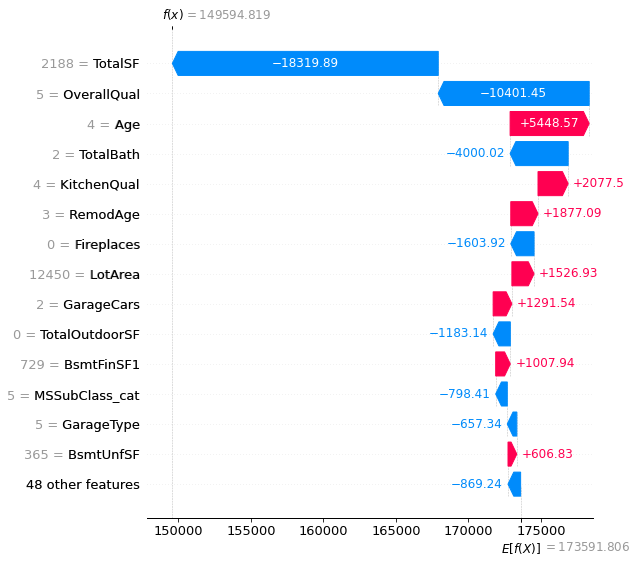

<IPython.core.display.Javascript object>

In [30]:
X_train.loc[10, "KitchenQual"] = 4


# Calculate SHAP values for the first instance in the dataset
instance_index = 10

# Create a SHAP explainer for the RandomForest model
explainer = shap.Explainer(best_rf, X_train)

# Calculate SHAP values for the modified instance
shap_values_instance = explainer(X_train.iloc[instance_index : instance_index + 1, :])

# Create a new figure with a specific size and dpi (dots per inch)
fig, ax = plt.subplots(figsize=(7, 4))

# Plot the SHAP values as a waterfall plot for the modified instance
shap.plots.waterfall(shap_values_instance[0], max_display=15, show=False)

# Save the figure to a file
# plt.savefig('Sawyer_west_qual4.png', bbox_inches='tight', dpi=900)

# Show the figure
plt.show()

# Close the figure
plt.close(fig)

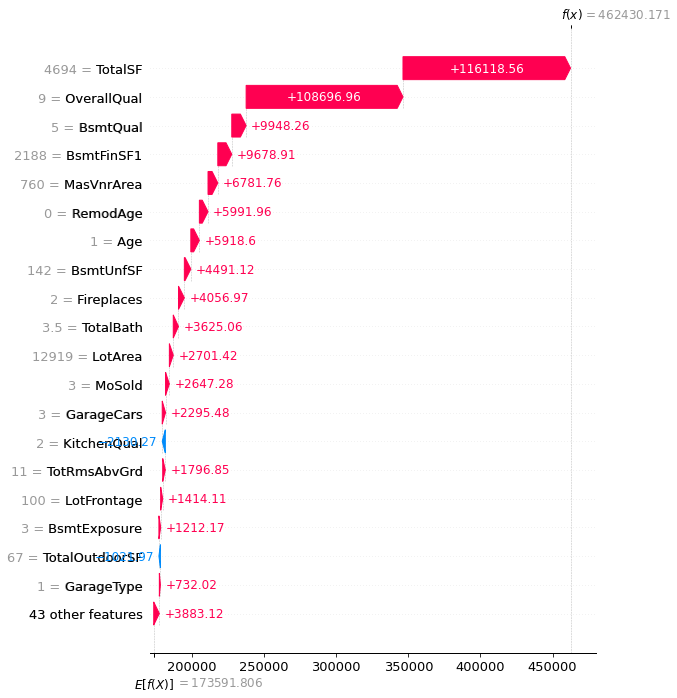

<IPython.core.display.Javascript object>

In [31]:
# X_train.loc[576, "KitchenQual"] = 4

# Calculate SHAP values for the first instance in the dataset
instance_index = 576

# Get the SHAP values for the specified instance in X_train
shap_values_instance = explainer(X_train.iloc[instance_index : instance_index + 1, :])

# Create a new figure with a specific size
fig, ax = plt.subplots(figsize=(7, 4))

# Plot the SHAP values as a waterfall plot for the instance
# A waterfall plot helps visualize the contribution of each feature to the final prediction for the instance
shap.plots.waterfall(shap_values_instance[0], max_display=20, show=False)

# Save the figure to a file
# plt.savefig("Northridge_heights_Qual4.png", bbox_inches="tight", dpi=900)

# Show the figure
plt.show()

# Close the figure
plt.close(fig)

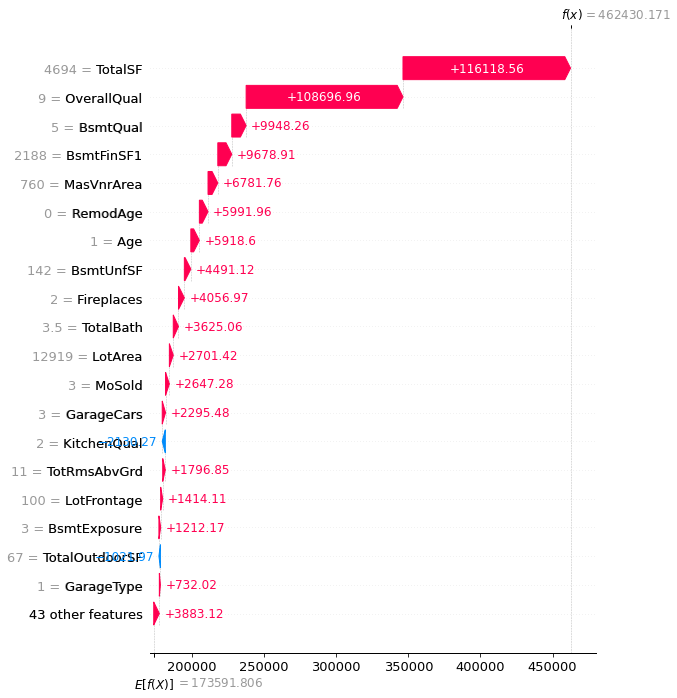

<IPython.core.display.Javascript object>

In [32]:
X_train.loc[576, "KitchenQual"] = 2

# Calculate SHAP values for the first instance in the dataset
instance_index = 576

# Get the SHAP values for the specified instance in X_train
shap_values_instance = explainer(X_train.iloc[instance_index : instance_index + 1, :])

# Create a new figure with a specific size
fig, ax = plt.subplots(figsize=(7, 4))

# Plot the SHAP values as a waterfall plot for the instance
# A waterfall plot helps visualize the contribution of each feature to the final prediction for the instance
shap.plots.waterfall(shap_values_instance[0], max_display=20, show=False)

# Save the figure to a file
# plt.savefig("Northridge_heights_Qual2.png", bbox_inches="tight", dpi=900)

# Show the figure
plt.show()

# Close the figure
plt.close(fig)

# What a kitchen looks like for each of the 5 variables


Excellent: In a kitchen with an "Excellent" quality rating, you might expect to find high-end appliances and finishes, such as stainless steel appliances, granite countertops, and custom cabinetry. The kitchen may be spacious and well-designed, with plenty of counter and storage space. The appliances could include a top-of-the-line refrigerator, oven, stove, dishwasher, and microwave.

Good: A kitchen with a "Good" quality rating might have some high-end finishes and appliances, but may not be as spacious or as well-designed as an "Excellent" kitchen. The appliances could include a mid-range refrigerator, oven, stove, dishwasher, and microwave. The countertops and cabinetry may be of good quality, but not necessarily as high-end as in an "Excellent" kitchen.

Typical/Average: A kitchen with a "Typical/Average" quality rating may have basic finishes and appliances, but is still functional and has everything necessary to prepare and cook food. The appliances could include a basic refrigerator, oven, stove, dishwasher, and microwave. The countertops and cabinetry may be made of standard materials, such as laminate or wood.

Fair: A kitchen with a "Fair" quality rating may be outdated or in need of some repairs or upgrades. The appliances could include older models of a refrigerator, oven, stove, dishwasher, and microwave. The countertops and cabinetry may be in need of refinishing or replacement.

Poor: A kitchen with a "Poor" quality rating may be in very poor condition or not functional at all. The appliances may be old and not working properly or missing altogether. The countertops and cabinetry may be damaged or missing as well. Overall, a "Poor" kitchen would likely need significant repairs or upgrades to make it usable.







# What needs to be done to bring average kitchen to an excellent kitchen


Bringing a kitchen from a "Typical/Average" quality rating up to an "Excellent" condition would require several upgrades and improvements. Here are some possible steps that you might need to take:

Replace or upgrade appliances: You may need to replace the refrigerator, oven, stove, dishwasher, and microwave with newer, higher-end models. This could cost several thousand dollars, depending on the appliances you choose.

Upgrade countertops and cabinetry: You may need to replace or refinish the countertops and cabinetry with higher-end materials such as granite, quartz, or custom cabinetry. This could cost several thousand dollars as well, depending on the materials and the size of the kitchen.

Improve lighting: You may need to add or improve the lighting in the kitchen to create a brighter, more welcoming atmosphere. This could involve adding new light fixtures, under-cabinet lighting, or a larger window. The cost of this will depend on the specific upgrades you choose.

Improve the layout: You may need to reconfigure the layout of the kitchen to make it more functional and efficient. This could involve moving appliances or walls, adding an island, or creating a more open floor plan. The cost of this will depend on the extent of the renovations required.